Preliminaries

In [1]:
%pip install -r requirements.txt

In [2]:
import requests
from bs4 import BeautifulSoup
from dotenv import load_dotenv
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

load_dotenv()


True

# Goal: Look at what grades achieved for the for each academic year
## Steps
1. Login to UoN SMIS Website programatically
2. Go to *Results* page.
3. Scrape results table
4. Transfer scraped data into a Pandas `Dataframe`
5. Group the grades per academic year
6. Visualize data.

### 1. Login to site to get session cookies

In [3]:
# To maintain cookies
s = requests.Session()

In [4]:
homepage_url = "https://smis.uonbi.ac.ke/index.php"
homepage_response = s.post(
    url=homepage_url,
    data={
        "regNo": os.getenv("REGISTRATION_NUMBER"),
        "smisPass": os.getenv("PASSWORD"),
        "smisLogon": "Login"
    },
    verify=False
)

/home/kraigochieng/miniconda3/envs/base1/lib/python3.10/site-packages/urllib3/connectionpool.py:1103: InsecureRequestWarning: Unverified HTTPS request is being made to host 'smis.uonbi.ac.ke'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


### 2. Go to *Results* page

In [ ]:
results_url = "https://smis.uonbi.ac.ke/result_slips.php"
results_response = s.get(
    url=results_url
)

soup = BeautifulSoup(results_response.text, features="html.parser")
# print(soup.prettify())

### 3. Scrape results table

In [6]:
course_rows = soup.find_all("tr", attrs={"align": "left"})
semester_date_rows =  soup.find_all("td", attrs={"align": "left", "colspan": "5"})

#rows = soup.find_all("td", attrs={"align": "left", "colspan": "5"})

In [7]:
# Create groups for semester dates
semester_dates = []
for semester_date_row in semester_date_rows:
    semester_date_row_text = semester_date_row.get_text(strip=True)
    year, month = semester_date_row_text.split("  ")
    semester_dates.append({
        "year": year,
        "month": month
    })

print(semester_dates)
    

[{'year': '2022/2023', 'month': 'January-April'}, {'year': '2022/2023', 'month': 'September-December'}, {'year': '2021/2022', 'month': 'January-April'}, {'year': '2021/2022', 'month': 'September-December'}]


### 4. Transfer scraped data into a Pandas `Dataframe`

In [8]:
courses = [[]]
for course_row in course_rows:
    fields = course_row.find_all("td")
    
    group = fields[0].get_text(strip=True)
    index = fields[1].get_text(strip=True)
    course_code = fields[2].get_text(strip=True)
    title = fields[3].get_text(strip=True)
    grade = fields[4].get_text(strip=True)
    
    index = int(index) - 1

    does_index_exist = False

    try:
        test_var = courses[index]
        does_index_exist = True
    except IndexError:
        does_index_exist = False

    if not does_index_exist:
        courses.append([])
        
    courses[index].append(
        {
            "course_code": course_code,
            "title": title,
            "grade": grade
        }
    )


In [9]:
courses_and_semester = []

for semester_index, semester_date in enumerate(semester_dates):
    for course_index in range(len(courses)):
        
        course = courses[course_index][semester_index]
        
        course_and_semester = {
                "year": semester_date["year"],
                "month":semester_date["month"],
                "name": course["title"],
                "grade": course["grade"],
                "code": course["course_code"]
            }
        
        courses_and_semester.append(course_and_semester)

In [10]:
df = pd.DataFrame(courses_and_semester)

In [11]:
df

,year,month,name,grade,code
0,2022/2023,January-April,PROBABILITY AND STATISTICS,C,CSC124
1,2022/2023,January-April,ASSEMBLY LANGUAGE PROGRAMMING,A,CSC216
2,2022/2023,January-April,AUTOMATA THEORY,A,CSC222
3,2022/2023,January-April,PROGRAMMING PROJECT,A,CSC227
4,2022/2023,January-April,WEB AND SERVICES PROGRAMMING,A,CSC228
5,2022/2023,January-April,MACHINE LEARNING ALGORITHMS & PROGRAMMING,A,CSC229
6,2022/2023,January-April,FOUNDATIONS OF HUMAN COMPUTER INTERACTION,C,CSC313
7,2022/2023,September-December,DIFFERENTIAL & INTEGRAL CALCULUS,A,CSC114
8,2022/2023,September-December,SYSTEMS ANALYSIS AND DESIGN,B,CSC212
9,2022/2023,September-December,COMPUTER ARCHITECTURE,A,CSC213


### 5. Group the grades per academic year

In [12]:
# grade_count_per_year_df = df.groupby("year")["grade"].value_counts()
grade_count_per_year_df = pd.crosstab(
    index=df["year"],
    columns=df["grade"],
    values=df["grade"],
    aggfunc="count"
)

grade_count_per_year_df = grade_count_per_year_df.div(grade_count_per_year_df.sum(axis=1),axis=0)
grade_count_per_year_df.sort_values(by="year", ascending=False, inplace=True)


### 6. Visualize data

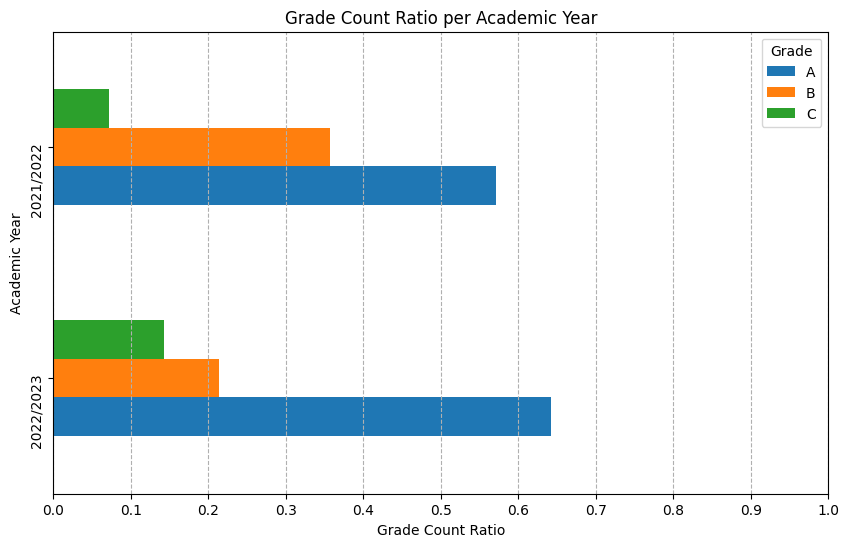

In [13]:
grade_count_per_year_df.plot(kind="barh", figsize=(10,6))

plt.title("Grade Count Ratio per Academic Year")
plt.legend(title="Grade")

plt.xlabel("Grade Count Ratio")
plt.ylabel("Academic Year")


plt.xlim(0,1)
y_step = 0.1
y_lower_limit = 0
y_upper_limit = 1
plt.xticks(np.arange(y_lower_limit, y_upper_limit + y_step, y_step))
plt.yticks(rotation=90)



plt.grid(visible=True, axis="x", linestyle="--")

plt.show()